In [20]:
# !pip install gdown==4.3.1
%pip install gdown==v4.6.3
%pip install openpyxl
%pip install pandas scikit-learn numpy
%pip install matplotlib
# Get dataset from Google Drive public link
# https://drive.google.com/file/d/1c0qJJuBvQ9KrLBpi6O4O_r3VPTtkh-Da/view?usp=sharing
!gdown --id 1c0qJJuBvQ9KrLBpi6O4O_r3VPTtkh-Da -O dataset.zip
# Unzip the file
!unzip dataset.zip -d dataset

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\hoang.nguyen1\AppData\Roaming\Python\Python312\site-packages\gdown\cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c0qJJuBvQ9KrLBpi6O4O_r3VPTtkh-Da
To: c:\Users\hoang.nguyen1\Downloads\dataset.zip

  0%|          | 0.00/2.49M [00:00<?, ?B/s]
 63%|██████▎   | 1.57M/2.49M [00:00<00:00, 13.8MB/s]
100%|██████████| 2.49M/2.49M [00:00<00:00, 13.5MB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Clean data for Income statement



In [21]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [22]:
# # Open a Income Statement as df
# modified = ['FANG', 'VNOM']

# for stock in modified:
#   mod_Income_Statement = pd.read_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} IS.xlsx')

#   # Insert a blank line between line 8 and 9 of mod_Income_Statement
#   specific_row = pd.Series([pd.NA] * (len(mod_Income_Statement.columns)), index=mod_Income_Statement.columns)

#   # Insert the specific row after row 8 (before row 9)
#   mod_Income_Statement = pd.concat([mod_Income_Statement.iloc[:7], specific_row.to_frame().T, mod_Income_Statement.iloc[7:]]).reset_index(drop=True)

#   # Save the modified
#   mod_Income_Statement.to_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} IS.xlsx', index=False)

In [23]:
# # Open a Balance Sheet as df
# modified = ['VNOM']

# for stock in modified:
#   mod_Balance_Sheet = pd.read_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} BS.xlsx')

#   # Insert a blank line between line 8 and 9 of mod_Balance_Sheet
#   specific_row = pd.Series([pd.NA] * (len(mod_Balance_Sheet.columns)), index=mod_Balance_Sheet.columns)

#   # Insert the specific row after row 8 (before row 9)
#   mod_Balance_Sheet = pd.concat([mod_Balance_Sheet.iloc[:7], specific_row.to_frame().T, mod_Balance_Sheet.iloc[7:]]).reset_index(drop=True)

#   # Insert 1 for all column in "ST Debt & Curr. Portion LT Debt"
#   special_row = pd.Series(['ST Debt & Curr. Portion LT Debt'] + [1] * (len(mod_Balance_Sheet.columns) - 1), index=mod_Balance_Sheet.columns)
#   mod_Balance_Sheet.loc[len(mod_Balance_Sheet)] = special_row

#   # Save the modified
#   mod_Balance_Sheet.to_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} BS.xlsx', index=False)

In [24]:
# List of stock symbols
stock_array = ['APA', 'BKR', 'CHRD', 'CHX', 'EXE', 'FANG', 'GPRE', 'PTEN', 'VNOM', 'WFRD']

# Initialize an empty DataFrame to store all income statements
all_income_statements = pd.DataFrame()

# Loop through each stock symbol in the array
for stock in stock_array:
    print(f"Processing data for {stock}")
    file_path = f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} IS.xlsx'
    df_income_statement = pd.read_excel(file_path)

    # Set column names and drop unnecessary rows as per your previous steps
    df_income_statement.columns = df_income_statement.iloc[6]
    df_income_statement = df_income_statement.drop(df_income_statement.index[0:8])

    # Transpose the DataFrame and set new column names
    df_income_statement = df_income_statement.transpose()
    df_income_statement.columns = df_income_statement.iloc[0]
    df_income_statement = df_income_statement.drop(df_income_statement.index[0])

    # Add calculated columns for Revenue and Operating Expenses
    df_income_statement['Revenue'] = df_income_statement['Sales']
    df_income_statement['Operating Expenses'] = (
        df_income_statement['Cost of Goods Sold (COGS) incl. D&A'] +
        df_income_statement['SG&A Expense'] +
        df_income_statement['Other SG&A']
    )

    # Reset index and rename the 'Per End' column
    df_income_statement = df_income_statement.reset_index()

    df_income_statement = df_income_statement.rename(columns={6: 'Per End'})

    # Add a column to identify the stock
    df_income_statement['Stock'] = stock

    df_income_statement = df_income_statement[['Stock', 'Per End', 'Revenue', 'Operating Expenses', 'Net Income']]

    # Append the current income statement to the combined DataFrame
    all_income_statements = pd.concat([all_income_statements, df_income_statement])

# Display the combined DataFrame
all_income_statements[['Stock', 'Per End', 'Revenue', 'Operating Expenses', 'Net Income']]

Processing data for APA
Processing data for BKR
Processing data for CHRD
Processing data for CHX
Processing data for EXE
Processing data for FANG
Processing data for GPRE
Processing data for PTEN
Processing data for VNOM
Processing data for WFRD


nan,Stock,Per End,Revenue,Operating Expenses,Net Income
0,APA,JUN '24,2543,1656,541
1,APA,MAR '24,1951,1389,132
2,APA,DEC '23,2167,1287,1773
3,APA,SEP '23,2308,1468,459
4,APA,JUN '23,1796,1153,381
...,...,...,...,...,...
95,WFRD,SEP '00,462.17,513.281,21.523
96,WFRD,JUN '00,421.848,481.354,13.204
97,WFRD,MAR '00,395.382,456.094,9.993
98,WFRD,DEC '99,372.639,413.623,7.489


# Clean data for Balance Sheet




In [25]:
# Initialize an empty DataFrame to store all income statements
all_balance_sheets = pd.DataFrame()

# Loop through each stock symbol in the array
for stock in stock_array:
    print(f"Processing data for {stock}")
    file_path = f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} BS.xlsx'
    df_Balance_Sheet = pd.read_excel(file_path)

    # Set column names and drop unnecessary rows as per your previous steps
    df_Balance_Sheet.columns = df_Balance_Sheet.iloc[6]
    df_Balance_Sheet = df_Balance_Sheet.drop(df_Balance_Sheet.index[0:8])

    # Transpose the DataFrame and set new column names
    df_Balance_Sheet = df_Balance_Sheet.transpose()
    df_Balance_Sheet.columns = df_Balance_Sheet.iloc[0]
    df_Balance_Sheet = df_Balance_Sheet.drop(df_Balance_Sheet.index[0])

    # Reset index and rename the 'Per End' column
    df_Balance_Sheet = df_Balance_Sheet.reset_index()

    df_Balance_Sheet = df_Balance_Sheet.rename(columns={6: 'Per End'})

    # Add a column to identify the stock
    df_Balance_Sheet['Stock'] = stock

    df_Balance_Sheet = df_Balance_Sheet[['Stock', 'Per End', 'Total Assets', 'Total Liabilities', "Total Shareholders' Equity", 'Book Value per Share', 'ST Debt & Curr. Portion LT Debt', "Long-Term Debt", 'Total Equity']]

    # Append the current income statement to the combined DataFrame
    all_balance_sheets = pd.concat([all_balance_sheets, df_Balance_Sheet])

# Display the combined DataFrame
all_balance_sheets[['Stock', 'Per End', 'Total Assets', 'Total Liabilities', "Total Shareholders' Equity"]]

Processing data for APA
Processing data for BKR
Processing data for CHRD
Processing data for CHX
Processing data for EXE
Processing data for FANG
Processing data for GPRE
Processing data for PTEN
Processing data for VNOM
Processing data for WFRD


nan,Stock,Per End,Total Assets,Total Liabilities,Total Shareholders' Equity
0,APA,JUN '24,20195,13700,5423
1,APA,MAR '24,14952,11299,2607
2,APA,DEC '23,15244,11553,2655
3,APA,SEP '23,13545,11438,1078
4,APA,JUN '23,13244,11548,709
...,...,...,...,...,...
95,WFRD,SEP '00,3405.228,1790.586,1415.334
96,WFRD,JUN '00,3456.027,1894.019,1362.932
97,WFRD,MAR '00,3534.018,1497.888,1837.165
98,WFRD,DEC '99,3447.712,1415.717,1833.398


In [26]:
# Loop through each stock symbol and create a separate DataFrame
for stock in stock_array:
    # Filter the all_balance_sheets DataFrame for the current stock
    df_stock_Balance_Sheet = all_balance_sheets[all_balance_sheets['Stock'] == stock].copy()

    # Dynamically create a DataFrame variable name
    globals()[f'df_{stock}_Balance_Sheet'] = df_stock_Balance_Sheet

    # Display or use the DataFrame as needed
    print(f"Data for {stock}:")
    print(globals()[f'df_{stock}_Balance_Sheet'].head())  # Display the first few rows of each DataFrame


Data for APA:
nan Stock  Per End Total Assets Total Liabilities Total Shareholders' Equity  \
0     APA  JUN '24        20195             13700                       5423   
1     APA  MAR '24        14952             11299                       2607   
2     APA  DEC '23        15244             11553                       2655   
3     APA  SEP '23        13545             11438                       1078   
4     APA  JUN '23        13244             11548                        709   

nan Book Value per Share ST Debt & Curr. Portion LT Debt Long-Term Debt  \
0               14.66366                             105           6741   
1                8.65806                             121           5178   
2                8.74575                             118           5351   
3                3.51373                             110           5582   
4                2.30745                             104           5574   

nan Total Equity  
0           6495  
1           3653

# Clean data for Cash Flow




In [27]:
# Initialize an empty DataFrame to store all income statements
all_cash_flows = pd.DataFrame()

# Loop through each stock symbol in the array
for stock in stock_array:
    print(f"Processing data for {stock}")
    file_path = f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} CF.xlsx'
    df_Cash_Flow = pd.read_excel(file_path)

    # Set column names and drop unnecessary rows as per your previous steps
    df_Cash_Flow.columns = df_Cash_Flow.iloc[6]
    df_Cash_Flow = df_Cash_Flow.drop(df_Cash_Flow.index[0:8])

    # Transpose the DataFrame and set new column names
    df_Cash_Flow = df_Cash_Flow.transpose()
    df_Cash_Flow.columns = df_Cash_Flow.iloc[0]
    df_Cash_Flow = df_Cash_Flow.drop(df_Cash_Flow.index[0])

    # Reset index and rename the 'Per End' column
    df_Cash_Flow = df_Cash_Flow.reset_index()

    df_Cash_Flow = df_Cash_Flow.rename(columns={6: 'Per End'})

    # Add a column to identify the stock
    df_Cash_Flow['Stock'] = stock

    df_Cash_Flow = df_Cash_Flow[['Stock', 'Per End', 'Net Operating Cash Flow', 'Net Investing Cash Flow']]

    # Append the current income statement to the combined DataFrame
    all_cash_flows = pd.concat([all_cash_flows, df_Cash_Flow])

# Display the combined DataFrame
all_cash_flows[['Stock', 'Per End', 'Net Operating Cash Flow', 'Net Investing Cash Flow']]

Processing data for APA
Processing data for BKR
Processing data for CHRD
Processing data for CHX
Processing data for EXE
Processing data for FANG
Processing data for GPRE
Processing data for PTEN
Processing data for VNOM
Processing data for WFRD


nan,Stock,Per End,Net Operating Cash Flow,Net Investing Cash Flow
0,APA,JUN '24,877,-64
1,APA,MAR '24,368,-88
2,APA,DEC '23,1030,-356
3,APA,SEP '23,764,-667
4,APA,JUN '23,1000,-583
...,...,...,...,...
95,WFRD,SEP '00,61.069,-65.186
96,WFRD,JUN '00,-2.905,-56.593
97,WFRD,MAR '00,-50.368,-38.887
98,WFRD,DEC '99,-16.618,11.414


#### **2.2. Financial Ratios**
- **P/E Ratio**: Stock Price / EPS.
- **P/B Ratio**: Stock Price / Book Value Per Share.
- **PEG Ratio**: P/E Ratio / Earnings Growth Rate.
- **Debt-to-Equity Ratio (D/E)**: A measure of financial leverage.

In [28]:
# df_Earning_Surprise = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 term project data/APA/APA Earnings surprise.xlsx')
# df_Earning_Surprise = df_Earning_Surprise.drop(df_Earning_Surprise.index[0:1])
# df_Earning_Surprise

In [29]:
# df_Earning_Surprise = pd.read_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} Earnings surprise.xlsx')
# df_Earning_Surprise = df_Earning_Surprise.drop(df_Earning_Surprise.index[0:1])
# df_Earning_Surprise

In [30]:
# List of stock symbols
stock_array = ['APA', 'BKR', 'CHRD', 'CHX', 'EXE', 'FANG', 'GPRE', 'PTEN', 'VNOM', 'WFRD']

# Initialize an empty DataFrame to store all income statements
all_earning_surprises = pd.DataFrame()

# Loop through each stock symbol in the array
for stock in stock_array:
    print(f"Processing data for {stock}")
    file_path = f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} Earnings surprise.xlsx'

    pd_APA_test = pd.read_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 original/{stock}/{stock} Earnings surprise.xlsx')
    pd_APA_test

    df_Earning_Surprise = pd.read_excel(f'dataset/FNCE-449-term-data-main/FNCE 449 term project data/{stock}/{stock} Earnings surprise.xlsx')
    df_Earning_Surprise = df_Earning_Surprise.drop(df_Earning_Surprise.index[0:1])

    pd_APA_test['Price'] = df_Earning_Surprise['Price']
    pd_APA_test

    df_Earning_Surprise = pd_APA_test

    df_Earning_Surprise = df_Earning_Surprise.drop(df_Earning_Surprise.index[0])

    df_Earning_Surprise['Per End'] = df_Earning_Surprise['Per End'].apply(lambda x: datetime.datetime.strptime(str(x), '%m/%y').strftime("%b '%y").upper())
    df_Earning_Surprise

    # Drop rows in column "Price" that has value NaN
    df_Earning_Surprise = df_Earning_Surprise.dropna(subset=['Price'])

    df_Earning_Surprise[['Per End','Reported','Price']]
    df_Earning_Surprise['P/E'] = df_Earning_Surprise['Price'] / df_Earning_Surprise['Reported']

    df_Earning_Surprise = pd.merge(df_Earning_Surprise, globals()[f'df_{stock}_Balance_Sheet'], on='Per End')

    for i in df_Earning_Surprise['Book Value per Share']:
        if i == 0:
            df_Earning_Surprise = df_Earning_Surprise.drop(df_Earning_Surprise[df_Earning_Surprise['Book Value per Share'] == i].index)

    df_Earning_Surprise['P/B'] = df_Earning_Surprise['Price'] / df_Earning_Surprise['Book Value per Share']
    df_Earning_Surprise

    # Projected earning is (Estimate[i] /Estimate [i+1])-1
    projected_earnings = (df_Earning_Surprise['Reported'].shift(1) / df_Earning_Surprise['Reported']) - 1
    projected_earnings
    df_Earning_Surprise['Projected Earning'] = projected_earnings
    df_Earning_Surprise

    df_Earning_Surprise['PEG'] = df_Earning_Surprise['P/E'] / df_Earning_Surprise['Projected Earning']

    df_Earning_Surprise[['Per End','Projected Earning','PEG']]

    df_Earning_Surprise['D/E'] = (df_Earning_Surprise["ST Debt & Curr. Portion LT Debt"] + df_Earning_Surprise["Long-Term Debt"]) / df_Earning_Surprise['Total Equity']

    # Add a column to identify the stock
    df_Earning_Surprise['Stock'] = stock

    # df_Earning_Surprise = df_Earning_Surprise[['Stock', 'Per End', 'P/E', 'P/B', 'D/E', 'PEG', 'Reported', 'Estimate']]
    df_Earning_Surprise = df_Earning_Surprise[['Stock', 'Per End', 'P/E', 'P/B', 'D/E', 'Reported', 'Estimate']]
    # Append the current income statement to the combined DataFrame
    all_earning_surprises = pd.concat([all_earning_surprises, df_Earning_Surprise])

# Display the combined DataFrame
# all_earning_surprises[['Stock', 'Per End', 'P/E', 'P/B', 'D/E', 'PEG', 'Reported', 'Estimate']]

Processing data for APA
Processing data for BKR
Processing data for CHRD
Processing data for CHX
Processing data for EXE
Processing data for FANG
Processing data for GPRE
Processing data for PTEN
Processing data for VNOM
Processing data for WFRD


# Earning suprise

In [31]:
df_Earning_Surprise_core = pd.merge(all_earning_surprises, all_balance_sheets, on=['Per End', 'Stock'])
df_Earning_Surprise_core = pd.merge(df_Earning_Surprise_core, all_income_statements, on=['Per End', 'Stock'])
# df_Earning_Surprise_core.drop(columns=['Stock_x', 'Stock_y'], inplace=True)
df_Earning_Surprise_core = pd.merge(df_Earning_Surprise_core, all_cash_flows, on=['Per End', 'Stock'])
# df_Earning_Surprise_core.drop(columns=['Stock_y'], inplace=True)
# df_Earning_Surprise_core.rename(columns={'Stock_x': 'Stock'}, inplace=True)
df_Earning_Surprise_core

,Stock,Per End,P/E,P/B,D/E,Reported,Estimate,Total Assets,Total Liabilities,Total Shareholders' Equity,Book Value per Share,ST Debt & Curr. Portion LT Debt,Long-Term Debt,Total Equity,Revenue,Operating Expenses,Net Income,Net Operating Cash Flow,Net Investing Cash Flow
0,APA,JUN '24,26.658120,2.127027,1.054042,1.170,0.881,20195,13700,5423,14.66366,105,6741,6495,2543,1656,541,877,-64
1,APA,MAR '24,38.853503,3.522729,1.450589,0.785,0.922,14952,11299,2607,8.65806,121,5178,3653,1951,1389,132,368,-88
2,APA,DEC '23,27.339130,3.594889,1.481712,1.150,1.326,15244,11553,2655,8.74575,118,5351,3691,2167,1287,1773,1030,-356
3,APA,SEP '23,29.759579,11.272921,2.701471,1.331,1.099,13545,11438,1078,3.51373,110,5582,2107,2308,1468,459,764,-667
4,APA,JUN '23,45.840188,16.906108,3.347877,0.851,0.806,13244,11548,709,2.30745,104,5574,1696,1796,1153,381,1000,-583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,WFRD,SEP '14,232.295597,0.005042,1.097834,0.318,NaN,20727,12785,7863,14652.05193,1715,7004,7942,3877,3889,77,350,372
408,WFRD,JUN '14,432.970711,0.006953,1.170807,0.239,NaN,21813,13763,7977,14883.71113,2404,7021,8050,3711,3814,-145,435,-348
409,WFRD,MAR '14,681.860465,0.005909,1.170744,0.129,NaN,21830,13859,7927,14886.71152,2293,7039,7971,3596,3884,-41,-406,-274
410,WFRD,DEC '13,1510.727273,0.005414,1.063879,0.055,NaN,21977,13774,8162,15348.02016,1666,7061,8203,3738,4380,-271,662,47


#### **2.3. Market and Industry Data**
- Historical **stock prices** for price ratios (P/E, P/B).
- Commodity prices (Crude Oil and Natural Gas) for industry trends.
- Volume and volatility data for market dynamics.

In [32]:
CL_Brent_price = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/CL Brent price.xlsx')
CL_Brent_price.rename(columns = {'Security':'Date','CO1 Comdty':'CL Brent Price','Unnamed: 2':'Quantity CL Brent'}, inplace = True)
CL_Brent_price = CL_Brent_price[6:]
CL_Brent_price['Date'] = pd.to_datetime(CL_Brent_price['Date'])
CL_Brent_price['Date'] = CL_Brent_price['Date'].dt.strftime("%b '%y").str.upper()
CL_Brent_price = CL_Brent_price[["Date","CL Brent Price"]]

CL_price = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/CL price.xlsx')
CL_price.rename(columns = {'Security':'Date','CL1 COMB Comdty':'CL WTI Price','Unnamed: 2':'Quantity CL'}, inplace = True)
CL_price = CL_price[6:]
CL_price['Date'] = pd.to_datetime(CL_price['Date'])
CL_price['Date'] = CL_price['Date'].dt.strftime("%b '%y").str.upper()
CL_price = CL_price[["Date","CL WTI Price"]]

NG_price = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/NG price.xlsx')
NG_price.rename(columns = {'Security':'Date','NG1 COMB Comdty':'NG Price','Unnamed: 2':'Quantity NG'}, inplace = True)
NG_price = NG_price[6:]
NG_price['Date'] = pd.to_datetime(NG_price['Date'])
NG_price['Date'] = NG_price['Date'].dt.strftime("%b '%y").str.upper()
NG_price = NG_price[["Date", "NG Price"]]

Fed_Fund_Rate = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/Federal Fund Rate.xlsx')
Fed_Fund_Rate.rename(columns = {'Security':'Date','FEDL01 Index':'Federal Fund Rate','Unnamed: 2':'Change'}, inplace = True)
Fed_Fund_Rate = Fed_Fund_Rate[5:]
Fed_Fund_Rate['Date'] = pd.to_datetime(Fed_Fund_Rate['Date'])
Fed_Fund_Rate['Date'] = Fed_Fund_Rate['Date'].dt.strftime("%b '%y").str.upper()
Fed_Fund_Rate = Fed_Fund_Rate[["Date", "Federal Fund Rate"]]

GDP_QoQ = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/GDP QoQ.xlsx')
GDP_QoQ.rename(columns = {'Security':'Date','GDP CQOQ Index':'GDP growth','Unnamed: 2':'ACTUAL_RELEASE_gdp_growth'}, inplace = True)
GDP_QoQ = GDP_QoQ[5:]
GDP_QoQ['Date'] = pd.to_datetime(GDP_QoQ['Date'])
GDP_QoQ['Date'] = GDP_QoQ['Date'].dt.strftime("%b '%y").str.upper()
GDP_QoQ = GDP_QoQ[["Date", "ACTUAL_RELEASE_gdp_growth"]]

Inflation_CPI = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/Inflation CPI.xlsx')
Inflation_CPI.rename(columns = {'Security':'Date','CPI CHNG Index':'CPI_growth','Unnamed: 2':'Change'}, inplace = True)
Inflation_CPI = Inflation_CPI[5:]
Inflation_CPI['Date'] = pd.to_datetime(Inflation_CPI['Date'])
Inflation_CPI['Date'] = Inflation_CPI['Date'].dt.strftime("%b '%y").str.upper()
Inflation_CPI = Inflation_CPI[["Date", "CPI_growth"]]

Inflation_PCE = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/Inflation PCE.xlsx')
Inflation_PCE.rename(columns = {'Security':'Date','PCE CMOM Index':'PCE_growth','Unnamed: 2':'ACTUAL_RELEASE'}, inplace = True)
Inflation_PCE = Inflation_PCE[5:]
Inflation_PCE['Date'] = pd.to_datetime(Inflation_PCE['Date'])
Inflation_PCE['Date'] = Inflation_PCE['Date'].dt.strftime("%b '%y").str.upper()
Inflation_PCE = Inflation_PCE[["Date", "PCE_growth"]]

# US_Employment_Rate = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/US Employment Rate.xlsx')
# US_Employment_Rate.rename(columns = {'Security':'Date','EHUPUS Index':'Unemployment Rate'}, inplace = True)
# US_Employment_Rate = US_Employment_Rate[5:]
# US_Employment_Rate['Date'] = pd.to_datetime(US_Employment_Rate['Date'])
# US_Employment_Rate['Date'] = US_Employment_Rate['Date'].dt.strftime("%b '%y").str.upper()
# US_Employment_Rate = US_Employment_Rate[["Date", "Unemployment Rate"]]

US_SA_NFP = pd.read_excel('dataset/FNCE-449-term-data-main/FNCE 449 original/US SA NFP.xlsx')
US_SA_NFP.rename(columns = {'Security':'Date','NFP T Index':'NFP'}, inplace = True)
US_SA_NFP = US_SA_NFP[5:]
US_SA_NFP['Date'] = pd.to_datetime(US_SA_NFP['Date'])
US_SA_NFP['Date'] = US_SA_NFP['Date'].dt.strftime("%b '%y").str.upper()
US_SA_NFP = US_SA_NFP[["Date", "NFP"]]

regression_input = pd.merge(CL_Brent_price, CL_price, on='Date')
regression_input = pd.merge(regression_input, Fed_Fund_Rate, on='Date')
regression_input = pd.merge(regression_input, GDP_QoQ, on='Date')
regression_input = pd.merge(regression_input, Inflation_CPI, on='Date')
regression_input = pd.merge(regression_input, Inflation_PCE, on='Date')
regression_input = pd.merge(regression_input, NG_price, on='Date')
# regression_input = pd.merge(regression_input, US_Employment_Rate, on='Date')
regression_input = pd.merge(regression_input, US_SA_NFP, on='Date')

regression_input = pd.merge(regression_input, df_Earning_Surprise_core, left_on='Date',right_on='Per End')
regression_input.to_csv('regression_input.csv', index=False)

In [33]:
regression_input.columns

Index(['Date', 'CL Brent Price', 'CL WTI Price', 'Federal Fund Rate',
       'ACTUAL_RELEASE_gdp_growth', 'CPI_growth', 'PCE_growth', 'NG Price',
       'NFP', 'Stock', 'Per End', 'P/E', 'P/B', 'D/E', 'Reported', 'Estimate',
       'Total Assets', 'Total Liabilities', 'Total Shareholders' Equity',
       'Book Value per Share', 'ST Debt & Curr. Portion LT Debt',
       'Long-Term Debt', 'Total Equity', 'Revenue', 'Operating Expenses',
       'Net Income', 'Net Operating Cash Flow', 'Net Investing Cash Flow'],
      dtype='object')

In [34]:
import pandas as pd

# Assuming regression_input is your DataFrame
# Loop through all columns except 'Date' and 'Reported'
for col in regression_input.columns:
    if col not in ['Date', 'Reported', 'Stock', 'Per End']:
        correlation = regression_input['Reported'].corr(regression_input[col])
        print(f'Correlation between Reported and {col}: {correlation}')


Correlation between Reported and CL Brent Price: 0.09835945241726672
Correlation between Reported and CL WTI Price: 0.09902106470105172
Correlation between Reported and Federal Fund Rate: 0.1211426171408354
Correlation between Reported and ACTUAL_RELEASE_gdp_growth: -0.09585602156892264
Correlation between Reported and CPI_growth: 0.06843877023373743
Correlation between Reported and PCE_growth: 0.17275613818305507
Correlation between Reported and NG Price: 0.06777522050571357
Correlation between Reported and NFP: 0.09812356392046509
Correlation between Reported and P/E: -0.010641873047773939
Correlation between Reported and P/B: -0.027347684228250915
Correlation between Reported and D/E: -0.005502598619557942
Correlation between Reported and Estimate: 0.4490392807936284
Correlation between Reported and Total Assets: 0.07403506784620689
Correlation between Reported and Total Liabilities: 0.04216424605513424
Correlation between Reported and Total Shareholders' Equity: 0.1188493271715605


2. Method 2: Train on all stock

In [35]:
# Load the data
data = pd.read_csv('regression_input.csv')
data = data.iloc[::-1]

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now drop rows with NaN values
data.dropna(inplace=True)

# Convert stock names to numbers
stock_array = ['APA', 'BKR', 'CHRD', 'CHX', 'EXE', 'FANG', 'GPRE', 'PTEN', 'VNOM', 'WFRD']
stock_to_num = {stock: idx for idx, stock in enumerate(stock_array)}
data['Stock_Num'] = data['Stock'].map(stock_to_num)

In [36]:
# Drop 'Date' as it should not be used as a feature for training
# However, keep the sorted order for time-based splitting
data = data.reset_index(drop=True)
dates = data['Date']

# Define features (X) and target variable (y)
X = data.drop(columns=['Date', 'Reported', 'Per End', 'Stock'])
y = data['Reported']

# Split data into time-based train and test sets (80% train, 20% test)
split_index = int(len(data) * 0.9035)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
dates_test = dates.iloc[split_index:]

# # 1. Without Normalization
# # Train the random forest model
# rf_no_scaling = RandomForestRegressor(random_state=42)
# rf_no_scaling.fit(X_train, y_train)

# # Predict on the test set
# y_pred_no_scaling = rf_no_scaling.predict(X_test)

# # Calculate RMSE
# rmse_no_scaling = np.sqrt(mean_squared_error(y_test, y_pred_no_scaling))
# print(f'RMSE without normalization: {rmse_no_scaling}')

# # Print the dates, true values, and predictions for the test set
# print("\nPredictions without normalization:")
# for date, ticker_num, true_val, analyst_val, pred_val in zip(dates_test, X_test['Stock_Num'], y_test, X_test['Estimate'], y_pred_no_scaling):
#     print(f"Date: {date}, Ticker: {stock_array[ticker_num]}, True Value: {true_val}, Analyst Value: {analyst_val}, Predicted Value: {pred_val}")

RMSE without normalization: 0.24374516575035254

Predictions without normalization:
Date: SEP '23, Ticker: WFRD, True Value: 1.607, Analyst Value: 1.15, Predicted Value: 1.5773799999999998
Date: SEP '23, Ticker: VNOM, True Value: 1.448, Analyst Value: 0.612, Predicted Value: 1.0185799999999998
Date: SEP '23, Ticker: PTEN, True Value: 0.202, Analyst Value: 0.244, Predicted Value: 0.24732000000000012
Date: SEP '23, Ticker: GPRE, True Value: 0.303, Analyst Value: -0.025, Predicted Value: 0.2624000000000001
Date: SEP '23, Ticker: FANG, True Value: 5.361, Analyst Value: 5.027, Predicted Value: 5.129120000000004
Date: SEP '23, Ticker: EXE, True Value: 1.093, Analyst Value: 0.521, Predicted Value: 0.9446399999999997
Date: SEP '23, Ticker: CHX, True Value: 0.409, Analyst Value: 0.495, Predicted Value: 0.47038000000000013
Date: SEP '23, Ticker: CHRD, True Value: 5.285, Analyst Value: 5.182, Predicted Value: 5.147909999999999
Date: SEP '23, Ticker: BKR, True Value: 0.512, Analyst Value: 0.394, P

In [37]:
# 2. With Normalization
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the random forest model with normalized data
rf_scaling = RandomForestRegressor(random_state=42)
rf_scaling.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_scaling = rf_scaling.predict(X_test_scaled)

# Calculate RMSE
rmse_scaling = np.sqrt(mean_squared_error(y_test, y_pred_scaling))
print(f'RMSE with normalization: {rmse_scaling}')

# Print the dates, true values, and predictions for the test set
print("\nPredictions with normalization:")
for date, ticker_num, true_val, analyst_val, pred_val in zip(dates_test, X_test['Stock_Num'], y_test, X_test['Estimate'], y_pred_scaling):
    print(f"Date: {date}, Ticker: {stock_array[ticker_num]}, True Value: {true_val}, Analyst Value: {analyst_val}, Predicted Value: {pred_val}")

RMSE with normalization: 0.24338852969412272

Predictions with normalization:
Date: SEP '23, Ticker: WFRD, True Value: 1.607, Analyst Value: 1.15, Predicted Value: 1.5773799999999998
Date: SEP '23, Ticker: VNOM, True Value: 1.448, Analyst Value: 0.612, Predicted Value: 1.0185799999999998
Date: SEP '23, Ticker: PTEN, True Value: 0.202, Analyst Value: 0.244, Predicted Value: 0.24732000000000012
Date: SEP '23, Ticker: GPRE, True Value: 0.303, Analyst Value: -0.025, Predicted Value: 0.26228000000000007
Date: SEP '23, Ticker: FANG, True Value: 5.361, Analyst Value: 5.027, Predicted Value: 5.131870000000005
Date: SEP '23, Ticker: EXE, True Value: 1.093, Analyst Value: 0.521, Predicted Value: 0.9458099999999996
Date: SEP '23, Ticker: CHX, True Value: 0.409, Analyst Value: 0.495, Predicted Value: 0.47038000000000013
Date: SEP '23, Ticker: CHRD, True Value: 5.285, Analyst Value: 5.182, Predicted Value: 5.150659999999999
Date: SEP '23, Ticker: BKR, True Value: 0.512, Analyst Value: 0.394, Predic

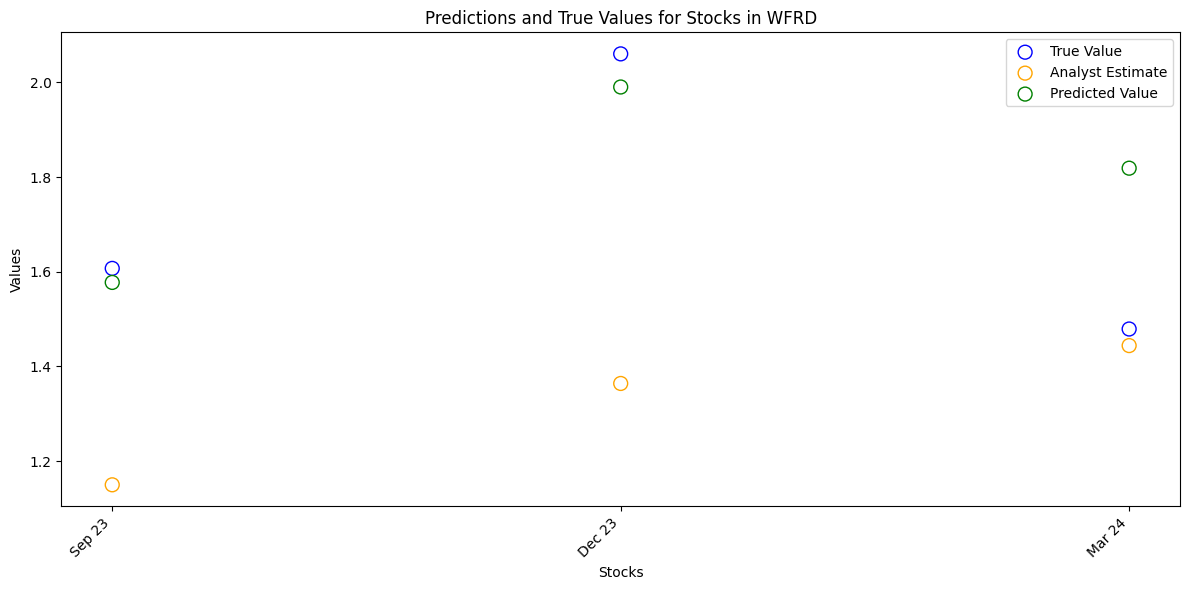

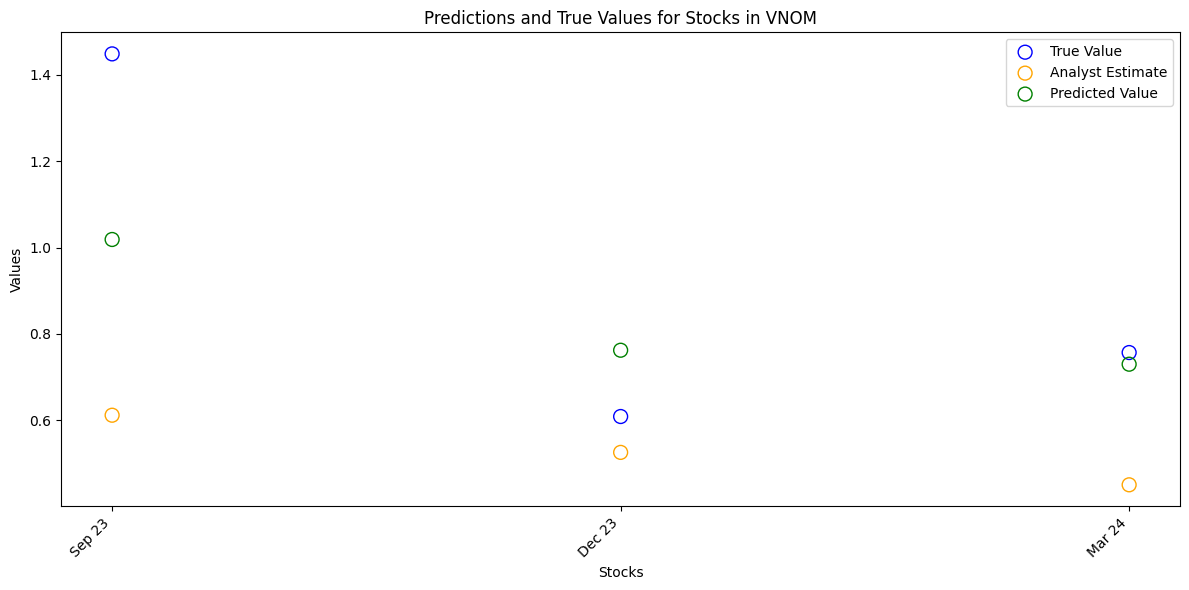

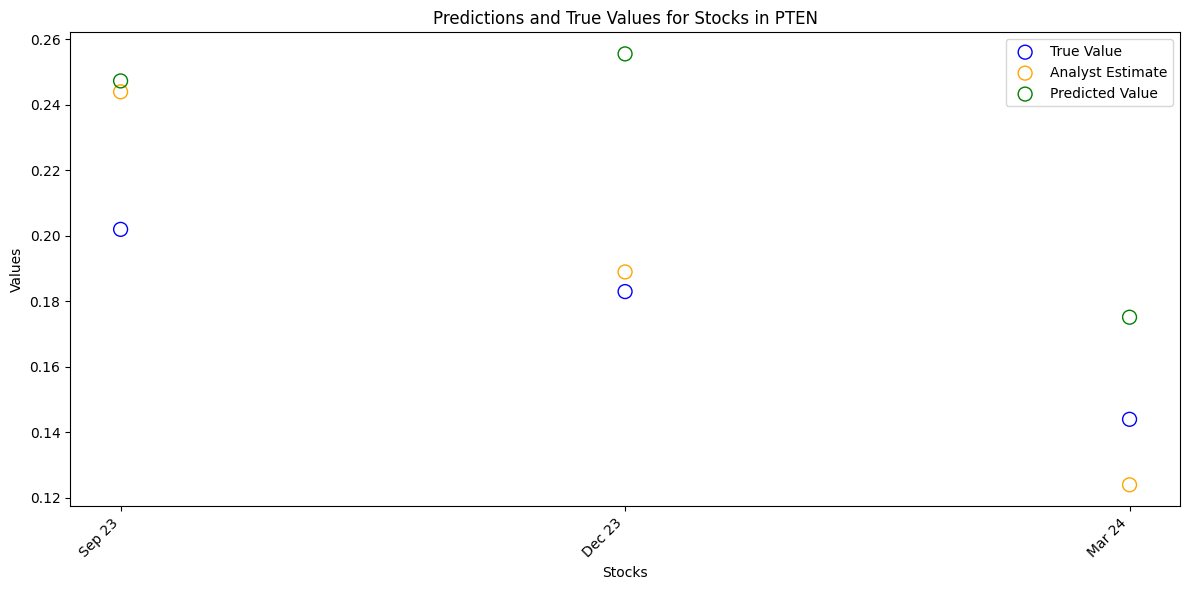

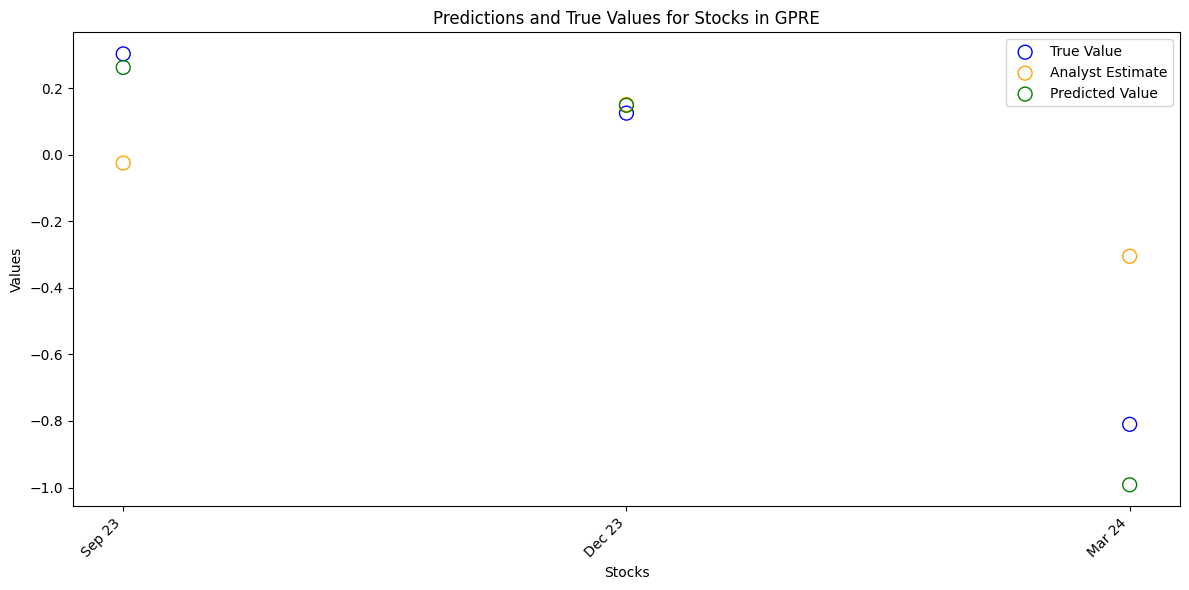

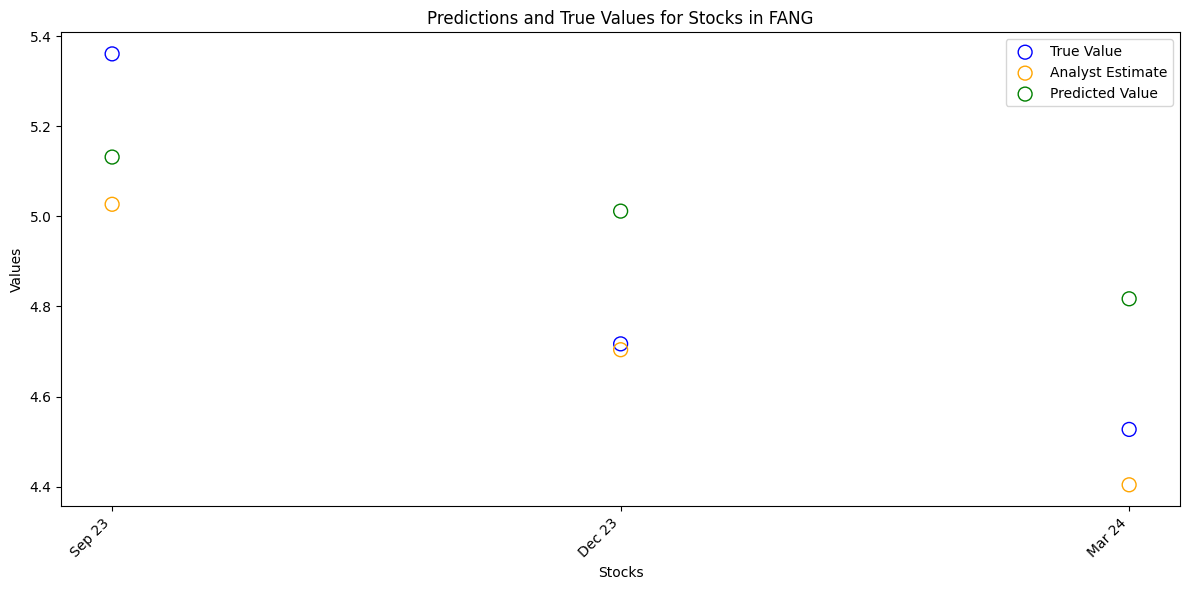

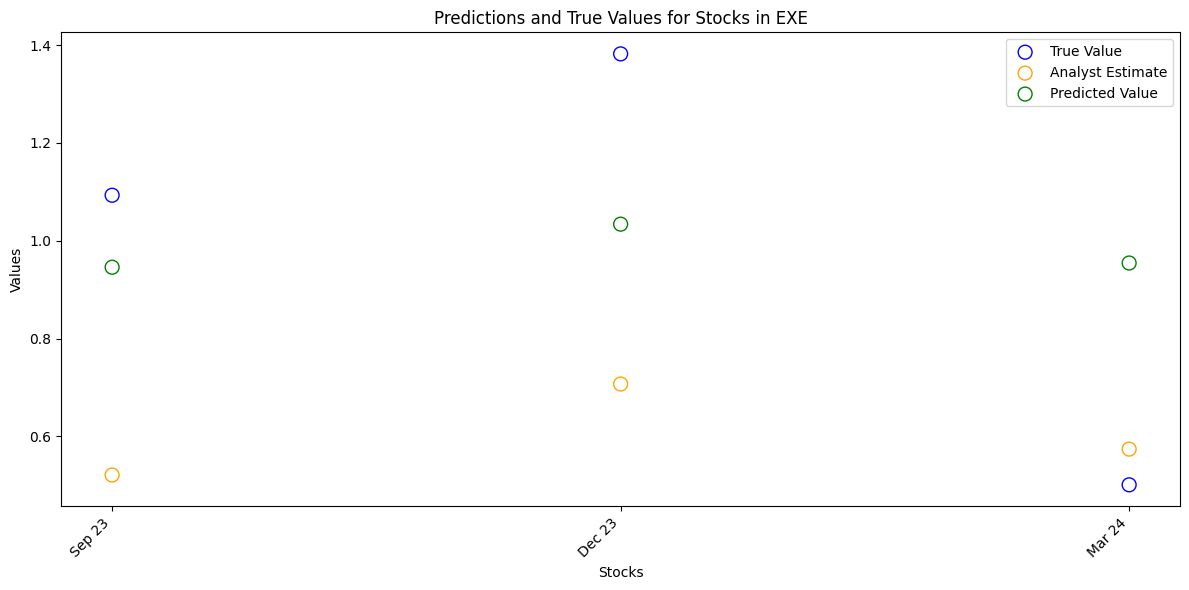

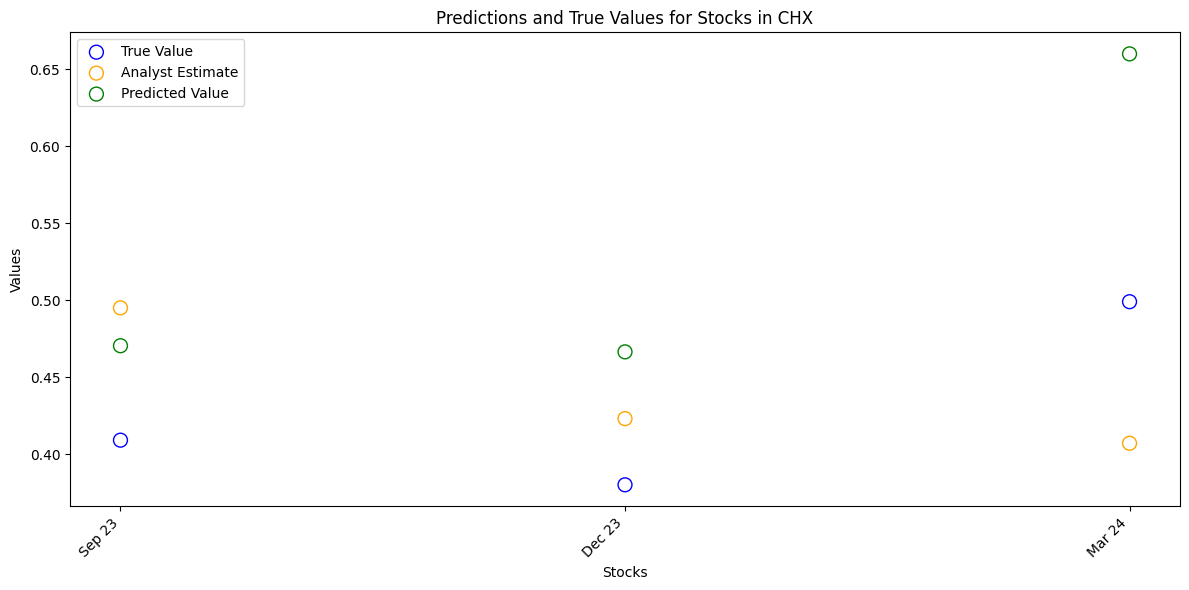

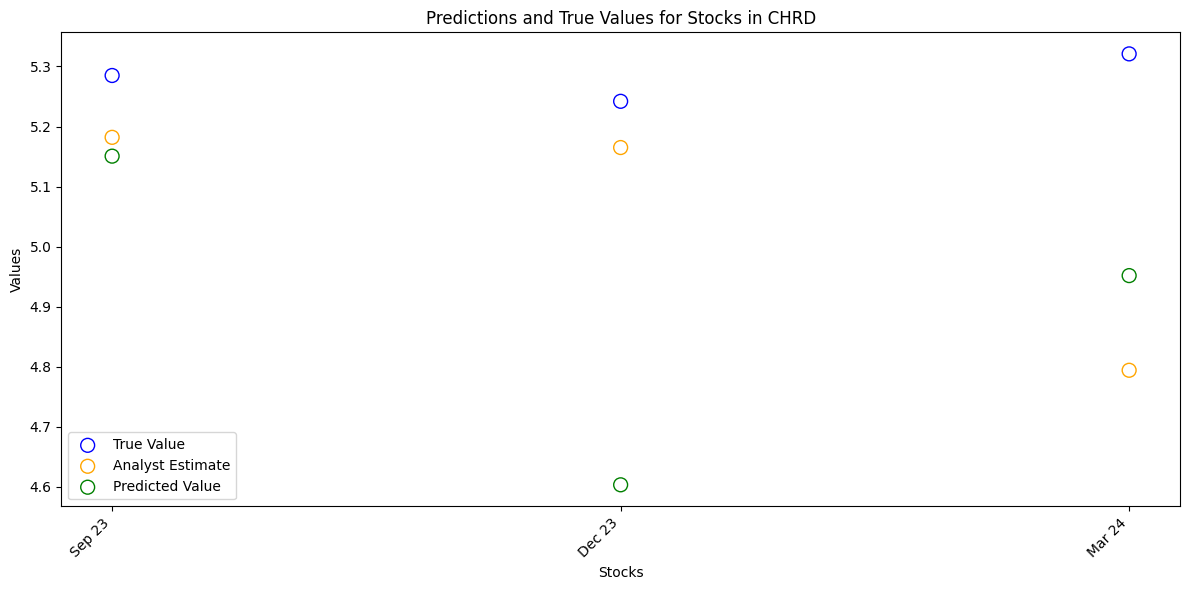

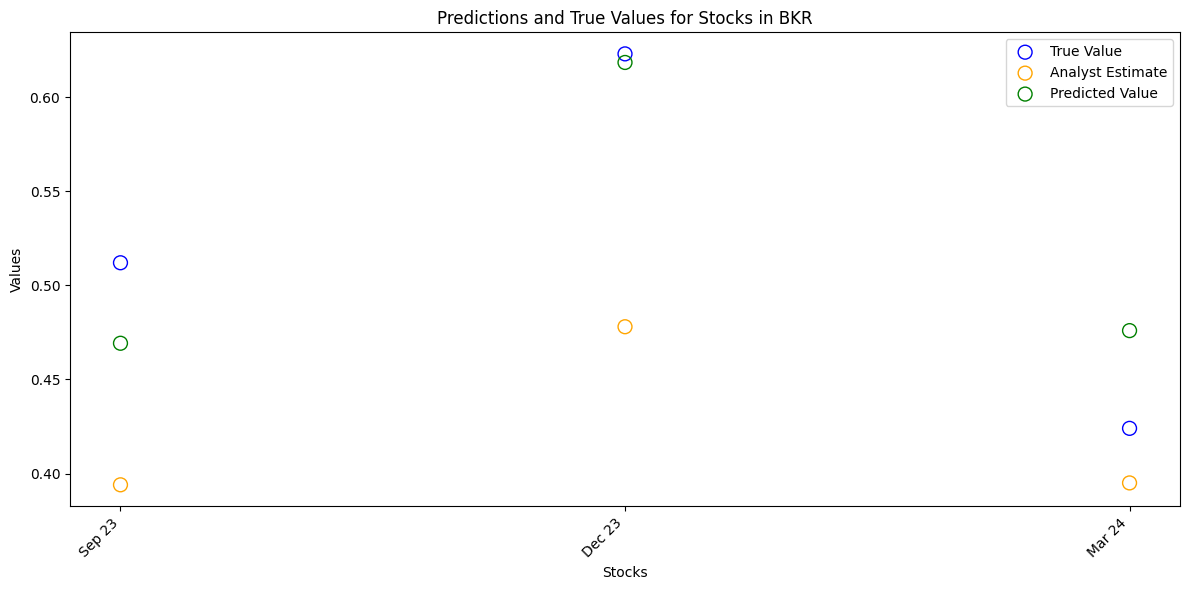

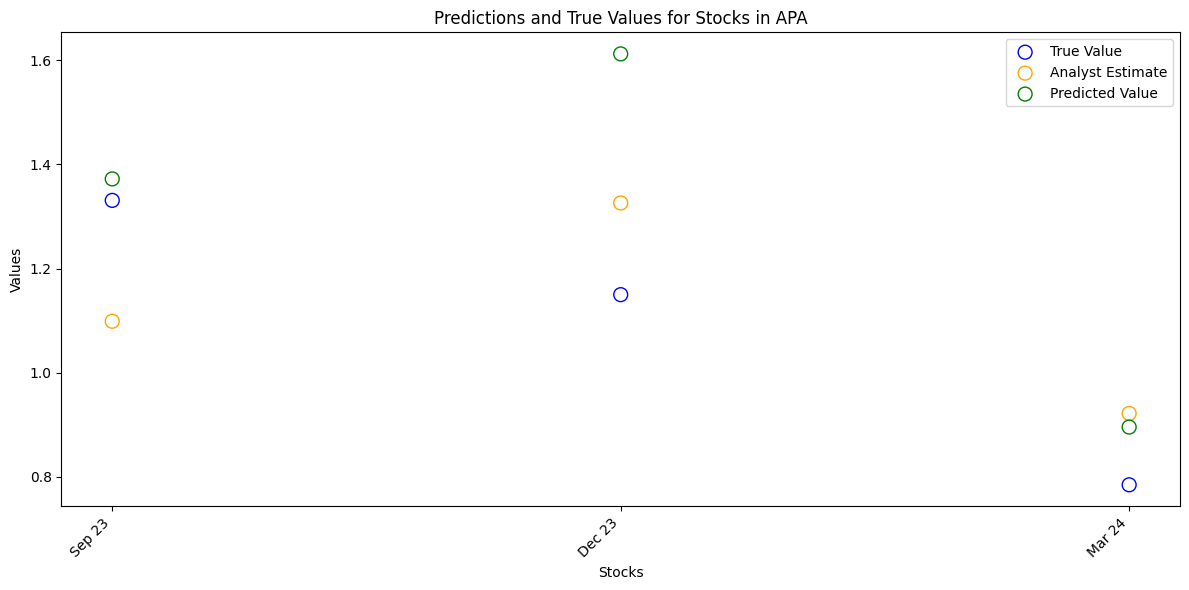

In [38]:
date = ['Sep 23', 'Dec 23', 'Mar 24']

for i in range(10):
    # Extract the subset of data for each range
    dates = dates_test.iloc[[i, i+10, i+20]]
    true_values = y_test.iloc[[i, i+10, i+20]]
    analyst_values = X_test['Estimate'].iloc[[i, i+10, i+20]]
    predicted_values = y_pred_scaling[[i, i+10, i+20]]  # Accessing NumPy array directly
    tickers = [stock_array[num] for num in X_test['Stock_Num'].iloc[[i, i+10, i+20]]]
    
    # Set up the figure
    x = np.arange(len(dates))  # Position on the x-axis for each stock

    plt.figure(figsize=(12, 6))

    # Plot each set of values as dots
    plt.scatter(x, true_values, color='blue', label='True Value', s=100, marker='o', facecolors='none')
    plt.scatter(x, analyst_values, color='orange', label='Analyst Estimate', s=100, marker='o', facecolors='none')
    plt.scatter(x, predicted_values, color='green', label='Predicted Value', s=100, marker='o', facecolors='none')

    # Add labels, title, and legend
    plt.xlabel('Stocks')
    plt.ylabel('Values')
    plt.title(f'Predictions and True Values for Stocks in {stock_array[9-i]}')
    plt.xticks(x, date, rotation=45, ha='right')  # Label each x position with the stock ticker
    plt.legend()
    plt.tight_layout()
    plt.show()